# CA06: Customer Segmentation Clustering Assignment
- **Objective:** The aim of this assignment is to perform customer segmentation using the K-Means clustering algorithm in order to better understand the different types of customers in a given dataset.
- **Dataset:** `Mall_Customers.csv` dataset, which can be found at the following link: https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv

The dataset contains the following attributes:
1. CustomerID: Unique ID for each customer
2. Gender: Male or Female
3. Age: Age of the customer
4. Annual Income(k$): Annual income of the customer in thousands of dollars
5. Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature (higher scores indicate higher spending)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA
Load the dataset and perform exploratory data analysis (EDA):
1. Import the necessary libraries (pandas, numpy, matplotlib, seaborn)
2. Load the dataset using pandas and display the first few rows
3. Check for missing values and handle them appropriately
4. Visualize the distribution of features using histograms or boxplots

In [3]:
df.shape

(200, 5)

In [4]:
# check for missing values per column
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# calculate the percentage of missing values per column
print(df.isnull().sum() / len(df) * 100)

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.describe().astype(int)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [9]:
df['Genre'].mode()

0    Female
Name: Genre, dtype: object

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


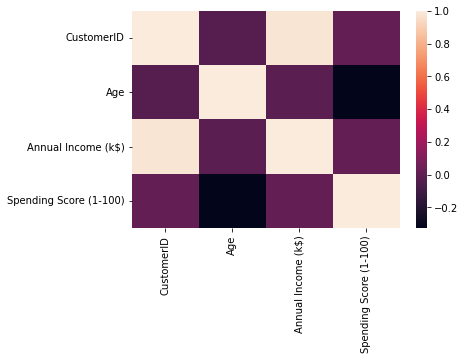

In [11]:
sns.heatmap(df.corr())
plt.show()

# Data Preparation
Prepare the data for clustering:

1. Perform any necessary feature scaling (StandardScaler or MinMaxScaler)
2. Choose the appropriate features for clustering (you may start with 'Annual Income' and 'Spending Score')
3. Create a new DataFrame with only the selected features

In [12]:
df_1 = pd.get_dummies(df, columns=['Genre'], drop_first=True)
df_1 = df_1.drop('CustomerID', axis=1)
df_1.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [13]:
from sklearn.preprocessing import StandardScaler

# instantiate StandardScaler
scaler = StandardScaler()

# scale data from df_1
scaled_data = scaler.fit_transform(df_1)

# create a dataframe with scaled data and respective column headers
df_scaled = pd.DataFrame(scaled_data, columns=df_1.columns)

df_scaled

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


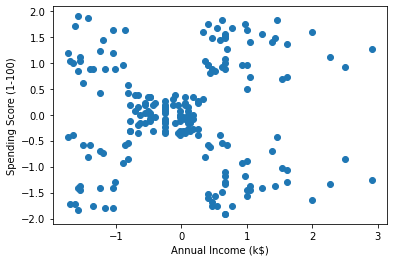

In [14]:
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)']) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

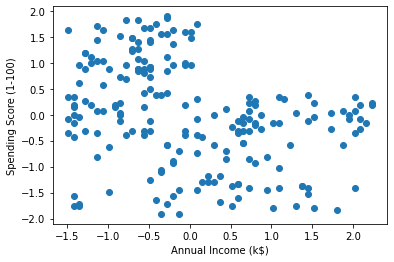

In [15]:
plt.scatter(df_scaled['Age'], df_scaled['Spending Score (1-100)']) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

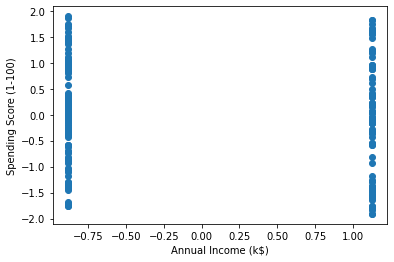

In [16]:
plt.scatter(df_scaled['Genre_Male'], df_scaled['Spending Score (1-100)']) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# k-means Clustering
Implement k-means clustering:
1. Import the KMeans class from the `sklearn.cluster` module
2. Use the Silhouette Method to determine the optimal number of clusters
3. Train the KMeans model with the optimal number of clusters
4. Obtain the cluster assignments for each data point

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
X = df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


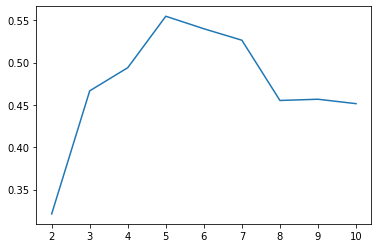

In [19]:
### generated by Chat-GPT:
silhouette_scores = []

for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2,11),silhouette_scores)

It appears that, out of our range from 2 to 11, the best number of clusters is 5, 6, and 7 (in that order). These are the cluster amounts that we will test.

In [20]:
# Run KMeans clustering
kmeans = KMeans(n_clusters=5,
                random_state=99)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels back to the original DataFrame
X['cluster'] = labels

X

/tmp/ipykernel_4172493/1578128644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = labels


,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,3
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,1
197,2.497807,0.923953,2
198,2.917671,-1.250054,1


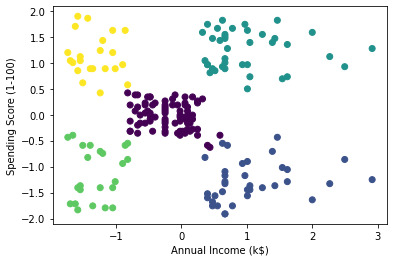

In [21]:
# Plot the clusters
plt.scatter(X.values[:, 0], X.values[:, 1], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Now, let's try this without scaling and by using original values

/tmp/ipykernel_4172493/2000072727.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cluster'] = labels


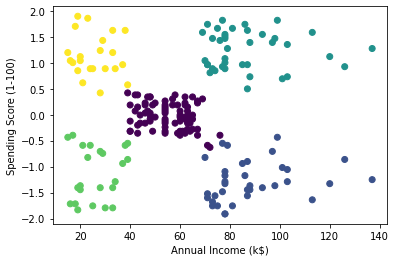

In [22]:
df_2 = df_1[['Annual Income (k$)', 'Spending Score (1-100)']]

# Run KMeans clustering
kmeans = KMeans(n_clusters=5,
                random_state=99)
kmeans.fit(df_2)
labels = kmeans.labels_

# Add the cluster labels back to the original DataFrame
df_2['cluster'] = labels

# Plot the clusters
plt.scatter(df_2.values[:, 0], X.values[:, 1], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

We got similar, if not same, results

# Conclusion

Using the KMeans algorithm, we successfully clustered our data into 5 distinct groups. Our data exploration revealed a clear clustering pattern when we plotted Annual Income (k) against Spending Score (1-100) on a scatterplot. By visually inspecting the plot, we were able to identify 5 clusters.

To confirm our intuition, we calculated the silhouette score for different values of K and found that K=5 provided the best clustering solution. After running KMeans with K=5, we observed that the algorithm was able to effectively group the data into 5 distinct clusters, with each cluster having its own unique characteristics.